<a id="setup"></a>
# <p style="background-color: #088F8F; font-family:calibri; color:white; font-size:160%; font-family:Verdana; text-align:center; border-radius:10px 30px;">Crop Water Requirement Prediction</p>

<a id="setup"></a>
# <p style="background-color:#2AAA8A; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step: 1 Setup</p>

<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 1.1 |</span><span style='color: #088F8F'> Importing Necessary Libraries</span></b>

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import pickle
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
df = pd.read_csv('c_w_r.csv')

print(df.dtypes)

df.head()

CROP_TYPE             object
SOIL_TYPE             object
REGION                object
TEMPERATURE           object
WEATHER_CONDITION     object
WATER_REQUIREMENT    float64
dtype: object


,CROP_TYPE,SOIL_TYPE,REGION,TEMPERATURE,WEATHER_CONDITION,WATER_REQUIREMENT
0,BANANA,DRY,DESERT,Oct-20,NORMAL,8.75
1,BANANA,DRY,DESERT,Oct-20,SUNNY,10.25
2,BANANA,DRY,DESERT,Oct-20,WINDY,9.65
3,BANANA,DRY,DESERT,Oct-20,RAINY,0.75
4,BANANA,DRY,DESERT,20-30,NORMAL,9.85


<a id="setup"></a>
# <p style="background-color:#2AAA8A; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step: 2 EDA</p>

<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 2.1 |</span><span style='color: #088F8F'> Exploring dataset</span></b>

  CROP_TYPE SOIL_TYPE  REGION TEMPERATURE WEATHER_CONDITION  WATER_REQUIREMENT
0    BANANA       DRY  DESERT      Oct-20            NORMAL               8.75
1    BANANA       DRY  DESERT      Oct-20             SUNNY              10.25
2    BANANA       DRY  DESERT      Oct-20             WINDY               9.65
3    BANANA       DRY  DESERT      Oct-20             RAINY               0.75
4    BANANA       DRY  DESERT       20-30            NORMAL               9.85
Shape of the data: (5760, 6)
Missing values:
CROP_TYPE            0
SOIL_TYPE            0
REGION               0
TEMPERATURE          0
WEATHER_CONDITION    0
WATER_REQUIREMENT    0
dtype: int64
CROP_TYPE             object
SOIL_TYPE             object
REGION                object
TEMPERATURE           object
WEATHER_CONDITION     object
WATER_REQUIREMENT    float64
dtype: object
       WATER_REQUIREMENT
count        5760.000000
mean            6.463141
std            22.685415
min             0.100000
25%             2

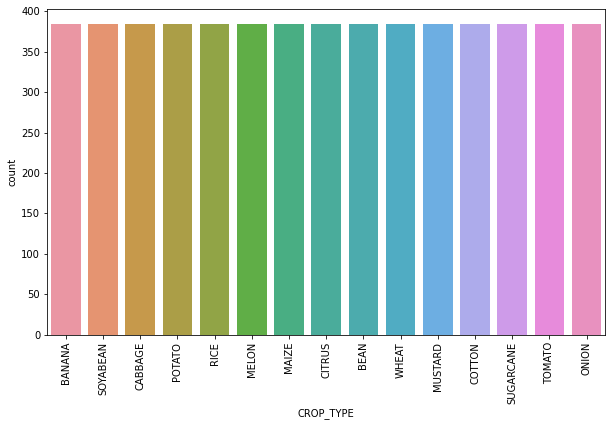

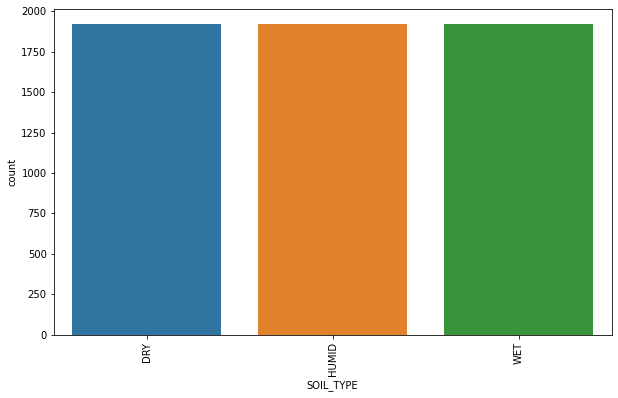

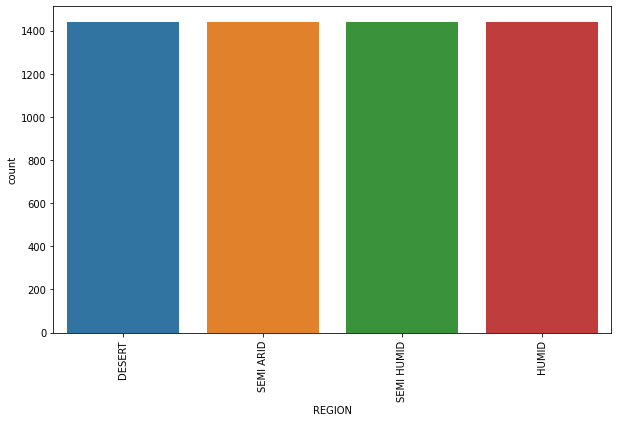

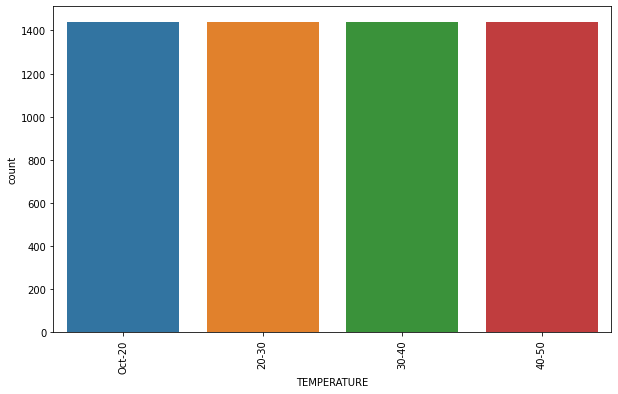

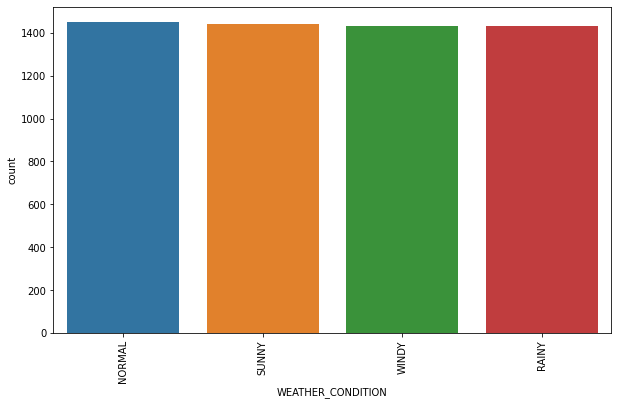

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is already loaded into a DataFrame named 'df'

# Print the first few rows of the data
print(df.head())

# Check the shape of the data
print(f"Shape of the data: {df.shape}")

# Check for missing values
print(f"Missing values:\n{df.isnull().sum()}")

# Print the data types of each column
print(df.dtypes)

# Print the summary statistics
print(df.describe())

# Plot bar charts for categorical columns
categorical_cols = ['CROP_TYPE', 'SOIL_TYPE', 'REGION', 'TEMPERATURE', 'WEATHER_CONDITION']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)
    plt.show()


<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 2.2 |</span><span style='color: #088F8F'> Correcting the Values of Temperature Column</span></b>

In [3]:
import numpy as np

# Print unique values in the 'TEMPERATURE' column
print(df['TEMPERATURE'].unique())

# Replace 'Oct-20' with '10-20'
df['TEMPERATURE'] = df['TEMPERATURE'].replace('Oct-20', '10-20')

# Print unique values again to confirm the replacement
print(df['TEMPERATURE'].unique())

['Oct-20' '20-30' '30-40' '40-50']
['10-20' '20-30' '30-40' '40-50']


<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 2.3 |</span><span style='color: #088F8F'> Checking the Unique Values of Each Coulmn</span></b>

In [4]:
print("**************Crop Type**************")
print(df['CROP_TYPE'].value_counts())
print(df['CROP_TYPE'].nunique())
print(df['CROP_TYPE'].unique())

print("**************Soil Type**************")
print(df['SOIL_TYPE'].value_counts())
print(df['SOIL_TYPE'].nunique())
print(df['SOIL_TYPE'].unique())

print("**************Region Type**************")
print(df['REGION'].value_counts())
print(df['REGION'].nunique())
print(df['REGION'].unique())

print("**************Temperature Range**************")
print(df['TEMPERATURE'].value_counts())
print(df['TEMPERATURE'].nunique())
print(df['TEMPERATURE'].unique())

print("**************weather condition Type**************")
print(df['WEATHER_CONDITION'].value_counts())
print(df['WEATHER_CONDITION'].nunique())
print(df['WEATHER_CONDITION'].unique())

**************Crop Type**************
BANANA       384
SOYABEAN     384
CABBAGE      384
POTATO       384
RICE         384
MELON        384
MAIZE        384
CITRUS       384
BEAN         384
WHEAT        384
MUSTARD      384
COTTON       384
SUGARCANE    384
TOMATO       384
ONION        384
Name: CROP_TYPE, dtype: int64
15
['BANANA' 'SOYABEAN' 'CABBAGE' 'POTATO' 'RICE' 'MELON' 'MAIZE' 'CITRUS'
 'BEAN' 'WHEAT' 'MUSTARD' 'COTTON' 'SUGARCANE' 'TOMATO' 'ONION']
**************Soil Type**************
DRY      1920
HUMID    1920
WET      1920
Name: SOIL_TYPE, dtype: int64
3
['DRY' 'HUMID' 'WET']
**************Region Type**************
DESERT        1440
SEMI ARID     1440
SEMI HUMID    1440
HUMID         1440
Name: REGION, dtype: int64
4
['DESERT' 'SEMI ARID' 'SEMI HUMID' 'HUMID']
**************Temperature Range**************
10-20    1440
20-30    1440
30-40    1440
40-50    1440
Name: TEMPERATURE, dtype: int64
4
['10-20' '20-30' '30-40' '40-50']
**************weather condition Type********

<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 2.4 |</span><span style='color: #088F8F'> Visualization of Water Requirement Column vs Other Columns</span></b>

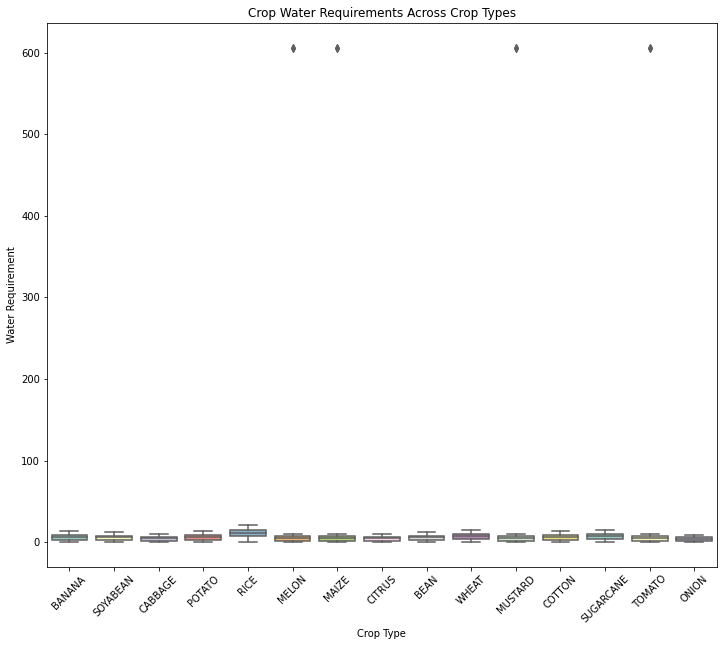

In [5]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='CROP_TYPE', y='WATER_REQUIREMENT', data=df, palette='Set3')
plt.title('Crop Water Requirements Across Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Water Requirement')
plt.xticks(rotation=45)
plt.show()


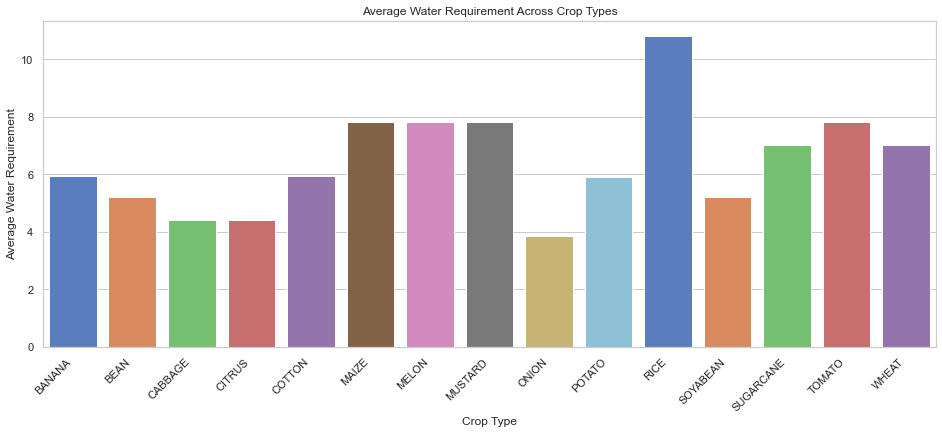

In [6]:

# Set the style for seaborn
sns.set(style="whitegrid")

# Calculate the average water requirement for each crop type
average_water_requirement = df.groupby('CROP_TYPE')['WATER_REQUIREMENT'].mean().reset_index()

# Visualization: Bar plot for average WATER_REQUIREMENT based on CROP_TYPE
plt.figure(figsize=(16, 6))
sns.barplot(x="CROP_TYPE", y="WATER_REQUIREMENT", data=average_water_requirement, palette="muted")
plt.title("Average Water Requirement Across Crop Types")
plt.xlabel("Crop Type")
plt.ylabel("Average Water Requirement")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


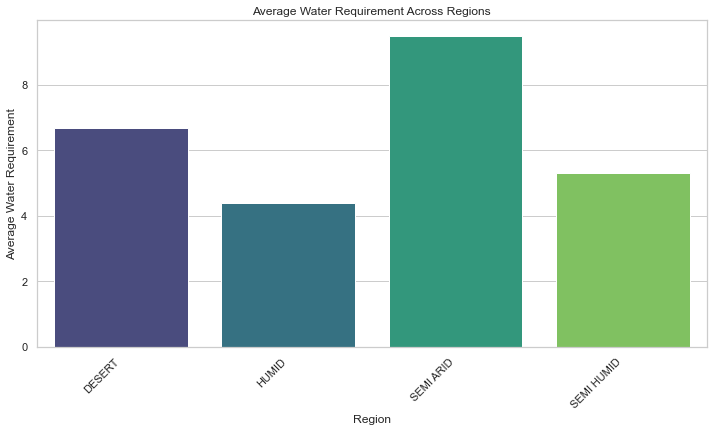

In [7]:
# Calculate the average water requirement for each region
average_water_requirement_region = df.groupby('REGION')['WATER_REQUIREMENT'].mean().reset_index()

# Visualization: Bar plot for average WATER_REQUIREMENT based on REGION
plt.figure(figsize=(12, 6))
sns.barplot(x="REGION", y="WATER_REQUIREMENT", data=average_water_requirement_region, palette="viridis")
plt.title("Average Water Requirement Across Regions")
plt.xlabel("Region")
plt.ylabel("Average Water Requirement")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


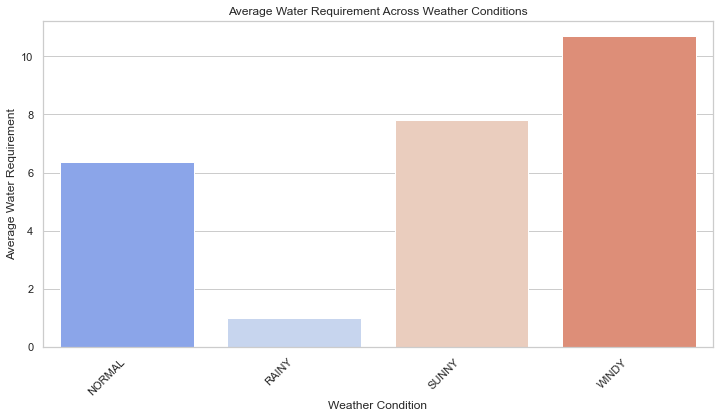

In [8]:
# Calculate the average water requirement for each weather condition
average_water_requirement_weather = df.groupby('WEATHER_CONDITION')['WATER_REQUIREMENT'].mean().reset_index()

# Visualization: Bar plot for average WATER_REQUIREMENT based on WEATHER_CONDITION
plt.figure(figsize=(12, 6))
sns.barplot(x="WEATHER_CONDITION", y="WATER_REQUIREMENT", data=average_water_requirement_weather, palette="coolwarm")
plt.title("Average Water Requirement Across Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Average Water Requirement")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


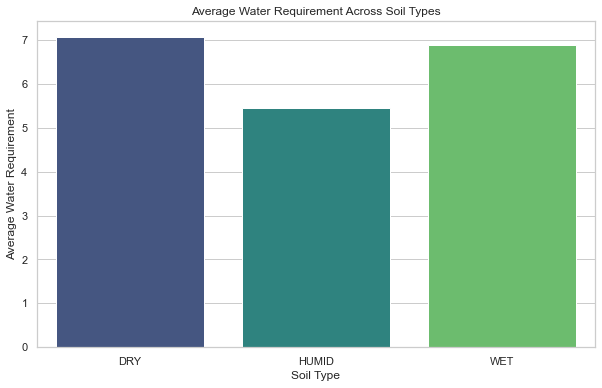

In [9]:
# Calculate the average water requirement for each soil type
average_water_requirement_soil = df.groupby('SOIL_TYPE')['WATER_REQUIREMENT'].mean().reset_index()

# Visualization: Bar plot for average WATER_REQUIREMENT based on SOIL_TYPE
plt.figure(figsize=(10, 6))
sns.barplot(x="SOIL_TYPE", y="WATER_REQUIREMENT", data=average_water_requirement_soil, palette="viridis")
plt.title("Average Water Requirement Across Soil Types")
plt.xlabel("Soil Type")
plt.ylabel("Average Water Requirement")
plt.show()


<a id="setup"></a>
# <p style="background-color:#2AAA8A; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step: 3 Making data Ready for Model</p>

<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 3.1 |</span><span style='color: #088F8F'> Label Encoding</span></b>

In [10]:
#label encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['CROP_TYPE'] = LE.fit_transform(df.CROP_TYPE)
st = LE.classes_
print(sorted(st))
df['SOIL_TYPE'] = LE.fit_transform(df.SOIL_TYPE)
st = LE.classes_
print(sorted(st))
df['REGION'] = LE.fit_transform(df.REGION)
st = LE.classes_
print(sorted(st))
df['TEMPERATURE'] = LE.fit_transform(df.TEMPERATURE)
st = LE.classes_
print(sorted(st))
df['WEATHER_CONDITION'] = LE.fit_transform(df.WEATHER_CONDITION)
st = LE.classes_
print(sorted(st))

print("\n",df.dtypes,"\n")

df.head()

['BANANA', 'BEAN', 'CABBAGE', 'CITRUS', 'COTTON', 'MAIZE', 'MELON', 'MUSTARD', 'ONION', 'POTATO', 'RICE', 'SOYABEAN', 'SUGARCANE', 'TOMATO', 'WHEAT']
['DRY', 'HUMID', 'WET']
['DESERT', 'HUMID', 'SEMI ARID', 'SEMI HUMID']
['10-20', '20-30', '30-40', '40-50']
['NORMAL', 'RAINY', 'SUNNY', 'WINDY']

 CROP_TYPE              int32
SOIL_TYPE              int32
REGION                 int32
TEMPERATURE            int32
WEATHER_CONDITION      int32
WATER_REQUIREMENT    float64
dtype: object 



,CROP_TYPE,SOIL_TYPE,REGION,TEMPERATURE,WEATHER_CONDITION,WATER_REQUIREMENT
0,0,0,0,0,0,8.75
1,0,0,0,0,2,10.25
2,0,0,0,0,3,9.65
3,0,0,0,0,1,0.75
4,0,0,0,1,0,9.85


<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 3.2 |</span><span style='color: #088F8F'> Feature Understanding using Correlation Matrix</span></b>

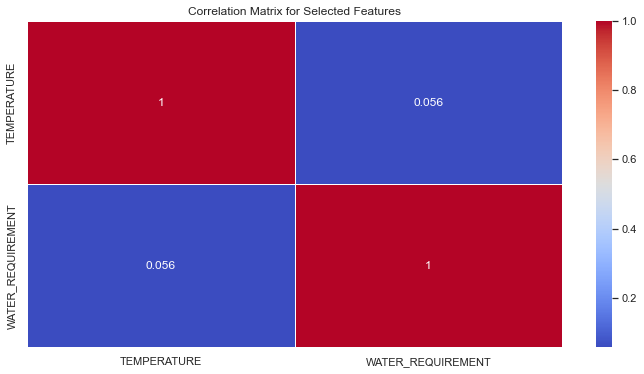

In [11]:
# Select relevant features for correlation analysis
selected_features = ['TEMPERATURE', 'WATER_REQUIREMENT']

# Create a subset of the DataFrame with selected features
subset_df = df[selected_features]

# Plot correlation matrix for the selected features
plt.figure(figsize=(12, 6))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Selected Features')
plt.show()


<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 3.3 |</span><span style='color: #088F8F'> Dividing Into Training and Testing Data</span></b>

In [12]:
#seperate into independent and dependent variables
x = df.iloc[:,:-1]
y = df.loc[:,'WATER_REQUIREMENT']

#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

x.head()

,CROP_TYPE,SOIL_TYPE,REGION,TEMPERATURE,WEATHER_CONDITION
0,0,0,0,0,0
1,0,0,0,0,2
2,0,0,0,0,3
3,0,0,0,0,1
4,0,0,0,1,0


<a id="setup"></a>
# <p style="background-color:#2AAA8A; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step: 4 Model Building, Training,& Evaluation</p>

<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 4.1 |</span><span style='color: #088F8F'> Inintiating with Random Forest Algorithm</span></b>

In [13]:
#importing random forest
random_forest_model = RandomForestRegressor()

#model training
random_forest_model.fit(x_train,y_train)
y_pred_rf = random_forest_model.predict(x_test)

#RMS Score method for accuracy
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred_rf)
print("R2 score :",r1*100)


from sklearn.metrics import mean_squared_error
# Assuming y_true and y_pred are your true and predicted values, respectively
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')


from sklearn.metrics import mean_absolute_error
# Assuming y_true and y_pred are your true and predicted values, respectively
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae}')

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_rf)
print(f'Explained Variance Score: {evs}')

from sklearn.metrics import max_error
me = max_error(y_test, y_pred_rf)
print(f'Max Error: {me}')

from sklearn.metrics import median_absolute_error
mae = median_absolute_error(y_test, y_pred_rf)
print(f'Median Absolute Error: {mae}')



R2 score : 97.39377210239944
Mean Squared Error: 6.905357267336401
Mean Absolute Error: 0.43109994171627
Explained Variance Score: 0.9739465861231298
Max Error: 65.99200000000008
Median Absolute Error: 0.15611428571428343


In [14]:
#accuracy
print("model score:",random_forest_model.score(x_test,y_test)*100)

model score: 97.39377210239944


<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 4.2 |</span><span style='color: #088F8F'> Metrics Visualizations</span></b>

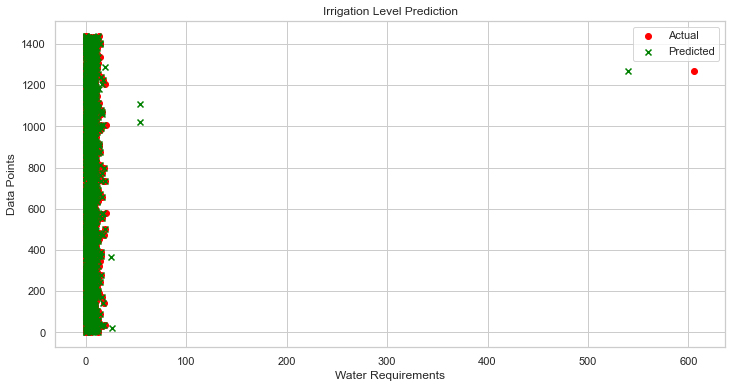

In [15]:
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, range(len(y_test)), color='red', label="Actual", marker='o')
plt.scatter(y_pred_rf, range(len(y_pred_rf)), color='green', label="Predicted", marker='x')
plt.title("Irrigation Level Prediction")
plt.xlabel("Water Requirements")
plt.ylabel("Data Points")
plt.legend(['Actual', 'Predicted'], loc="upper right")
plt.show()

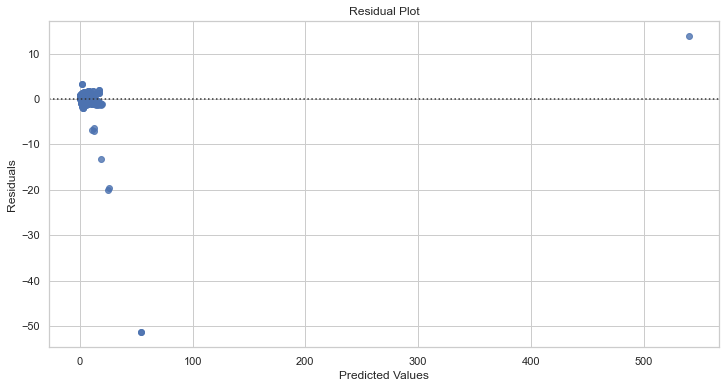

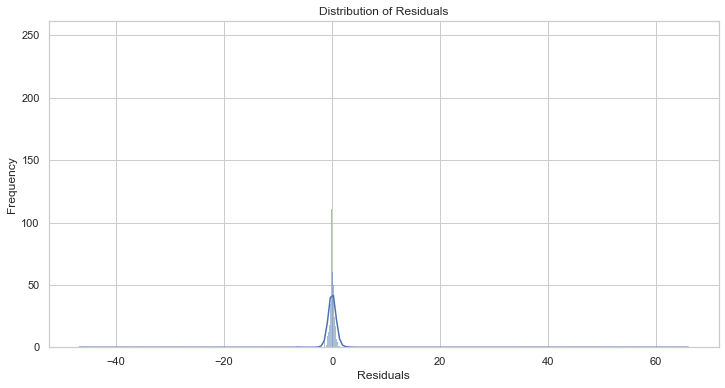

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot
plt.figure(figsize=(12, 6))
sns.residplot(x=y_pred_rf, y=y_test - y_pred_rf)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(y_test - y_pred_rf, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


<a id="setup"></a>
# <p style="background-color:#2AAA8A; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step: 5 Working with other Algorithms</p>

<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 5.1 |</span><span style='color: #088F8F'>Model Creation,Training,& Evaluation</span></b>

In [17]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score, max_error, mean_squared_log_error, median_absolute_error

# List of regression models
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    SVR(),
    Lasso(),
    AdaBoostRegressor(),
    DecisionTreeRegressor(),
    CatBoostRegressor(silent=True),
    lgb.LGBMRegressor(),
    
]

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Print evaluation metrics
    print(f"\n{type(model).__name__} Evaluation:")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Explained Variance Score:", explained_variance_score(y_test, y_pred))
    print("Max Error:", max_error(y_test, y_pred))
    print("Median Absolute Error:", median_absolute_error(y_test, y_pred))



RandomForestRegressor Evaluation:
R2 Score: 0.9578606525424048
Mean Squared Error: 11.165073072658688
Mean Absolute Error: 0.5057730444324195
Explained Variance Score: 0.9579588959310015
Max Error: 64.71909999999995
Median Absolute Error: 0.15969999999999374

GradientBoostingRegressor Evaluation:
R2 Score: 0.12201877141579953
Mean Squared Error: 232.6263970610775
Mean Absolute Error: 3.0133287810388785
Explained Variance Score: 0.12289214174362784
Max Error: 547.8113454264645
Median Absolute Error: 1.3327454087864687

XGBRegressor Evaluation:
R2 Score: 0.6662958116024947
Mean Squared Error: 88.4169279521879
Mean Absolute Error: 2.5268536428955595
Explained Variance Score: 0.666295838094766
Max Error: 169.00685424804686
Median Absolute Error: 0.5580644488334654

SVR Evaluation:
R2 Score: 0.015029112483471052
Mean Squared Error: 260.973949457335
Mean Absolute Error: 2.8431788747062425
Explained Variance Score: 0.015034311212933305
Max Error: 600.3229533078234
Median Absolute Error: 1.68

<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 5.2 |</span><span style='color: #088F8F'>Visualization of Different Models w.r.t Evaluation Metrics</span></b>

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 4320, number of used features: 5
[LightGBM] [Info] Start training from score 6.608949


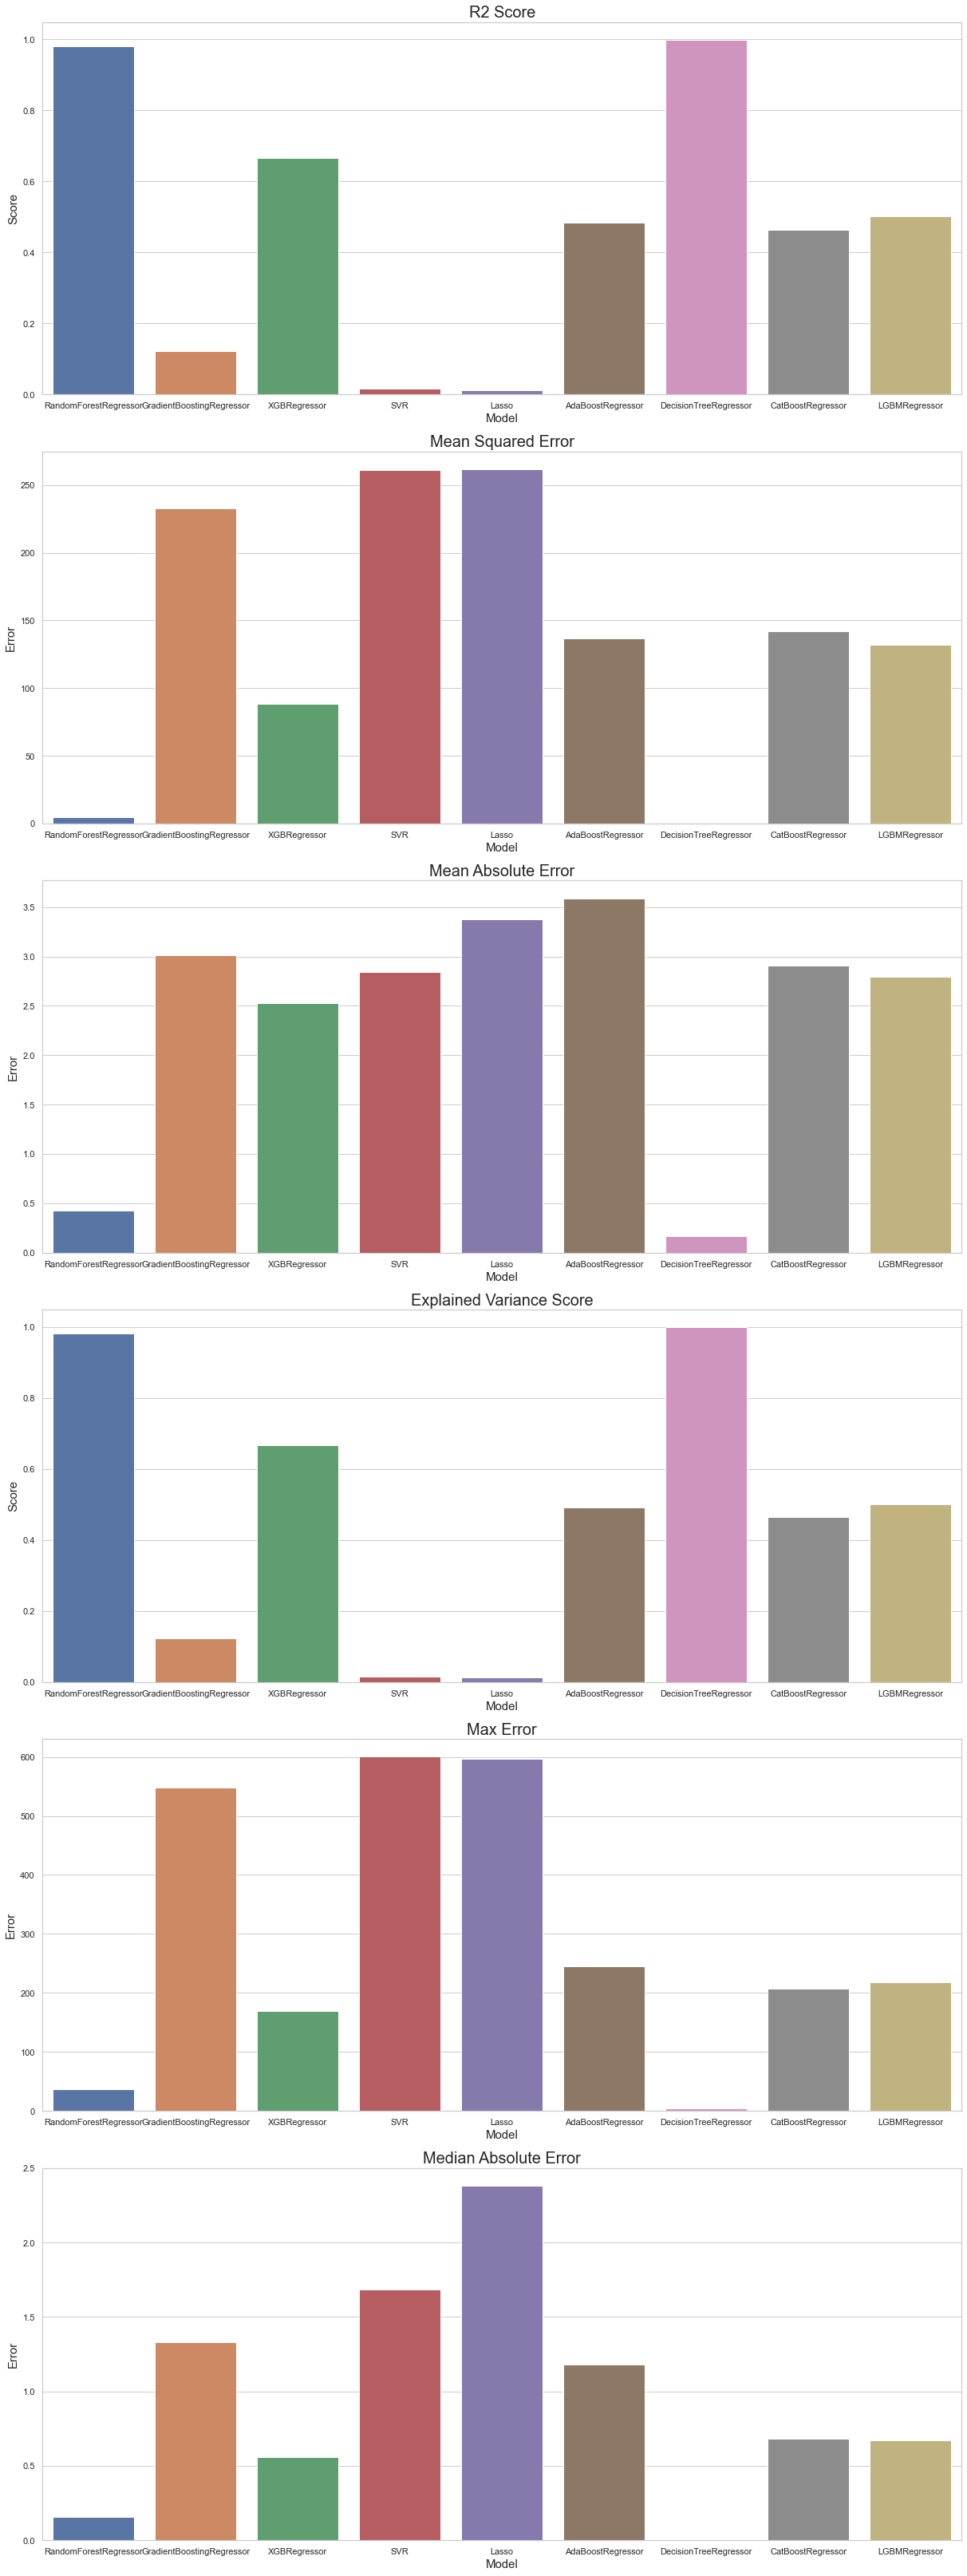

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of regression models
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    SVR(),
    Lasso(),
    AdaBoostRegressor(),
    DecisionTreeRegressor(),
    CatBoostRegressor(silent=True),
    lgb.LGBMRegressor(),
]

# Create empty lists to store metrics for visualization
model_names = []
r2_scores = []
mse_scores = []
mae_scores = []
evs_scores = []
max_errors = []
median_abs_errors = []

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Store model name
    model_names.append(type(model).__name__)
    
    # Store evaluation metrics
    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    evs_scores.append(explained_variance_score(y_test, y_pred))
    max_errors.append(max_error(y_test, y_pred))
    median_abs_errors.append(median_absolute_error(y_test, y_pred))

# Create a DataFrame for visualization
metrics_df = pd.DataFrame({
    'Model': model_names,
    'R2 Score': r2_scores,
    'Mean Squared Error': mse_scores,
    'Mean Absolute Error': mae_scores,
    'Explained Variance Score': evs_scores,
    'Max Error': max_errors,
    'Median Absolute Error': median_abs_errors
})

# Plot the metrics
plt.figure(figsize=(17, 45))

# R2 Score
plt.subplot(6, 1, 1)
sns.barplot(x='Model', y='R2 Score', data=metrics_df)
plt.title('R2 Score', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Score', fontsize=15)

# Mean Squared Error
plt.subplot(6, 1, 2)
sns.barplot(x='Model', y='Mean Squared Error', data=metrics_df)
plt.title('Mean Squared Error', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Error', fontsize=15)

# Mean Absolute Error
plt.subplot(6, 1, 3)
sns.barplot(x='Model', y='Mean Absolute Error', data=metrics_df)
plt.title('Mean Absolute Error', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Error', fontsize=15)

# Explained Variance Score
plt.subplot(6, 1, 4)
sns.barplot(x='Model', y='Explained Variance Score', data=metrics_df)
plt.title('Explained Variance Score', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Score', fontsize=15)

# Max Error
plt.subplot(6, 1, 5)
sns.barplot(x='Model', y='Max Error', data=metrics_df)
plt.title('Max Error', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Error', fontsize=15)

# Median Absolute Error
plt.subplot(6, 1, 6)
sns.barplot(x='Model', y='Median Absolute Error', data=metrics_df)
plt.title('Median Absolute Error', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Error', fontsize=15)

plt.tight_layout()
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 4320, number of used features: 5
[LightGBM] [Info] Start training from score 6.608949


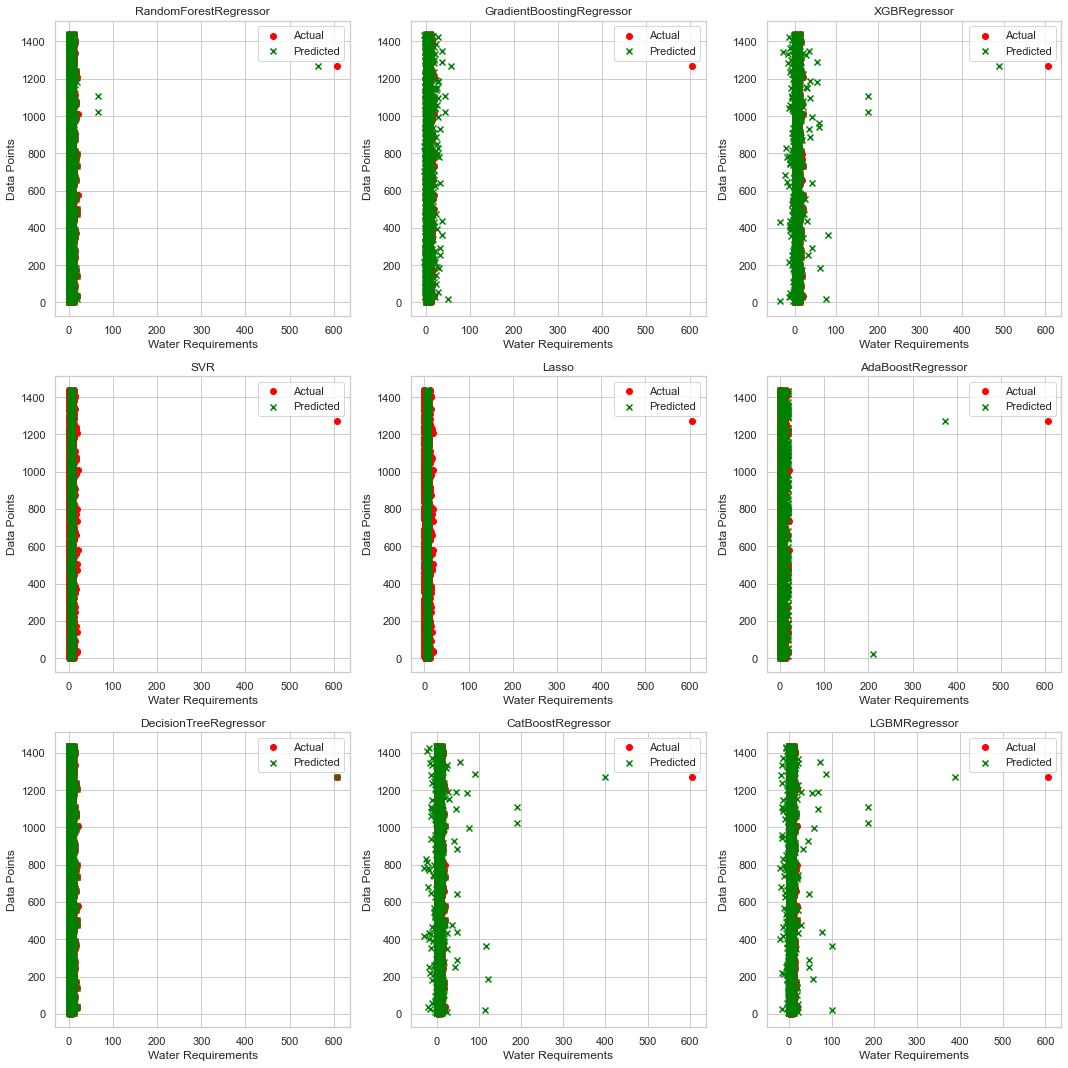

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# List of regression models
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    SVR(),
    Lasso(),
    AdaBoostRegressor(),
    DecisionTreeRegressor(),
    CatBoostRegressor(silent=True),
    lgb.LGBMRegressor(),
]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes for iteration
axes = axes.flatten()

# Train and evaluate each model
for ax, model in zip(axes, models):
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Scatter plot for actual values
    ax.scatter(y_test, range(len(y_test)), color='red', label="Actual", marker='o')
    
    # Scatter plot for predicted values
    ax.scatter(y_pred, range(len(y_pred)), color='green', label="Predicted", marker='x')
    
    # Set plot labels and title
    ax.set_title(type(model).__name__)
    ax.set_xlabel("Water Requirements")
    ax.set_ylabel("Data Points")
    ax.legend(['Actual', 'Predicted'], loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()


In [20]:
#importing random forest
decision_tree_model = DecisionTreeRegressor()

#model training
decision_tree_model.fit(x_train,y_train)
y_pred_rf = decision_tree_model.predict(x_test)

#RMS Score method for accuracy
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred_rf)
print("R2 score :",r1*100)

from sklearn.metrics import mean_squared_error
# Assuming y_true and y_pred are your true and predicted values, respectively
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import mean_absolute_error
# Assuming y_true and y_pred are your true and predicted values, respectively
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae}')

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_rf)
print(f'Explained Variance Score: {evs}')

from sklearn.metrics import max_error
me = max_error(y_test, y_pred_rf)
print(f'Max Error: {me}')

from sklearn.metrics import median_absolute_error
mae = median_absolute_error(y_test, y_pred_rf)
print(f'Median Absolute Error: {mae}')

R2 score : 99.89269840774332
Mean Squared Error: 0.28430201003086425
Mean Absolute Error: 0.168275462962963
Explained Variance Score: 0.9989290589521803
Max Error: 4.85
Median Absolute Error: 0.0


<a id="setup"></a>
# <p style="background-color:#2AAA8A; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step: 6 Saving the top Performing Models</p>

In [21]:
pickle.dump(decision_tree_model, open('decision_tree_model.pkl', 'wb'))
pickle.dump(random_forest_model, open('random_forest_model.pkl', 'wb'))